In [1]:
options(repr.plot.width = 8, repr.plot.height = 6)

## Регрессия: датасет Yacht Hydrodynamics
http://archive.ics.uci.edu/ml/datasets/Yacht+Hydrodynamics#

Для парусных яхт нужно предсказать остаточное сопротивление на единицу массы смещения от размеров яхты и ее скорости.

In [2]:
t <- read.table('yacht_hydrodynamics.data', sep = ',', header = TRUE)
t[1:5,]

Longitudinal_position,Prismatic_coefficient,Length.displacement_ratio,Beam.draught_ratio,Length.beam_ratio,Froude_number,Residuary_resistance
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-2.3,0.568,4.78,3.99,3.17,0.125,0.11
-2.3,0.568,4.78,3.99,3.17,0.150,0.27
-2.3,0.568,4.78,3.99,3.17,0.175,0.47
-2.3,0.568,4.78,3.99,3.17,0.200,0.78
-2.3,0.568,4.78,3.99,3.17,0.225,1.18


Разделение выборки на обучающую и тестовую

In [3]:
# install.packages('caret')
library(caret)

a <- createDataPartition(t$Residuary_resistance, p = 0.7, list = FALSE)
train <- t[a,]
test <- t[-a,]

Loading required package: lattice

Loading required package: ggplot2



### Обучение

`lm(formula, data, subset, weights, na.action, ...)`

* `formula` -- формула
* `data` --  данные
* `subset` -- указывает на подмножество наблюдений, которые нужно использоваться для обучения
* `weights` -- веса для взвешенного МНК
* `na.action` -- функция, указывающая, что делать с пропусками

Возвращает объект, у которого есть:
* `coefficients` -- вектор коэффициентов
* `residuals` -- остатки модели

Полная справка:

In [4]:
?lm

Обучаем на train модель вида $Residuary\_resistance = \theta_1 + \theta_2 \cdot Froude\_number$

In [5]:
model <- lm(formula = Residuary_resistance ~ Froude_number, data = train)
model


Call:
lm(formula = Residuary_resistance ~ Froude_number, data = train)

Coefficients:
  (Intercept)  Froude_number  
       -24.22         120.89  


Оценки параметров линейной регрессии

In [6]:
model$coefficients  # все коэффициенты
model$coefficients[1]  # взять первый коэффициент

(Intercept) Froude_number 
    -24.21565     120.89434

(Intercept) 
  -24.21565

Ковариационная матрица вектора $\widehat{\theta}$ в условиях гомоскедастичности

In [7]:
vcov(model)

,(Intercept),Froude_number
(Intercept),3.243856,-10.04964
Froude_number,-10.049644,34.99755


### Свойства (в гауссовской линейной модели)

Некоторая информация о модели. Оба признака значимы, поскольку pvalue мало. То есть отвергаются гипотезы $\theta_1 = 0$ и $\theta_2 = 0$.

*Печатает:*

*Остатки: минимум, 0.25-квантиль, медиана, 0.75-квантиль, максимум*

*Для каждого коэффициента: его оценка, стандартная ошибка, значение t-статистики гипотезы о незначимости коэффициента, pvalue этой гипотезы, звездочки значимости (чем больше, тем более значим коэффициент)*

*RSS и число степеней свободы, R^2 т его поправленная версия, значение F-статистики критерия Фишера о значимости регрессии вообще, число степеней свободы распределения Фишера, pvalue этой гипотезы.*

In [8]:
summary(model)


Call:
lm(formula = Residuary_resistance ~ Froude_number, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.237  -7.745  -1.761   6.262  32.233 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -24.216      1.801  -13.45   <2e-16 ***
Froude_number  120.894      5.916   20.44   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.795 on 214 degrees of freedom
Multiple R-squared:  0.6612,	Adjusted R-squared:  0.6596 
F-statistic: 417.6 on 1 and 214 DF,  p-value: < 2.2e-16


Можно вытащить отдельные числа

In [9]:
summary(model)$r.squared

[1] 0.6611851

Доверительные интервалы для коэффициентов

In [10]:
confint(model, level = 0.95)

,2.5 %,97.5 %
(Intercept),-27.76576,-20.66554
Froude_number,109.23349,132.55518


### Предсказания

Предсказания строятся с помощью универсальной функции `predict`. Для линейной регрессии она эквивалентна функции `predict.lm`. По ней можно получить справку:

In [11]:
?predict.lm

В предположениях гауссовской линейной модели можно построить два типа интервалов -- доверительный (`confidence`) и предсказательный (`prediction`). Первый является доверительными интервалом в обычном смысле для среднего значения отклика. Второй является интервалом, в котором с большой вероятностью лежит само значение отклика. Второй итервал всегда шире первого.

Предсказание значений на новых объектах вместе с доверительным интервалом

In [12]:
predicted <- predict(model, test, level = 0.95, interval = 'confidence')
predicted[1:3,]

,fit,lwr,upr
2,-6.081503,-8.068719,-4.094287
3,-3.059145,-4.820265,-1.298025
8,12.052647,10.863675,13.241619


Предсказание значений на новых объектах вместе с предсказательным интервалом

In [13]:
predicted <- predict(model, test, level = 0.95, interval = 'prediction')
predicted[1:3,]

,fit,lwr,upr
2,-6.081503,-23.530023,11.36702
3,-3.059145,-20.483362,14.36507
8,12.052647,-5.323067,29.42836


MSE посчитаем ручками

In [14]:
mean((predicted[,1] - test$Residuary_resistance) ^ 2)

[1] 83.7649

Посмотрим на график предсказания

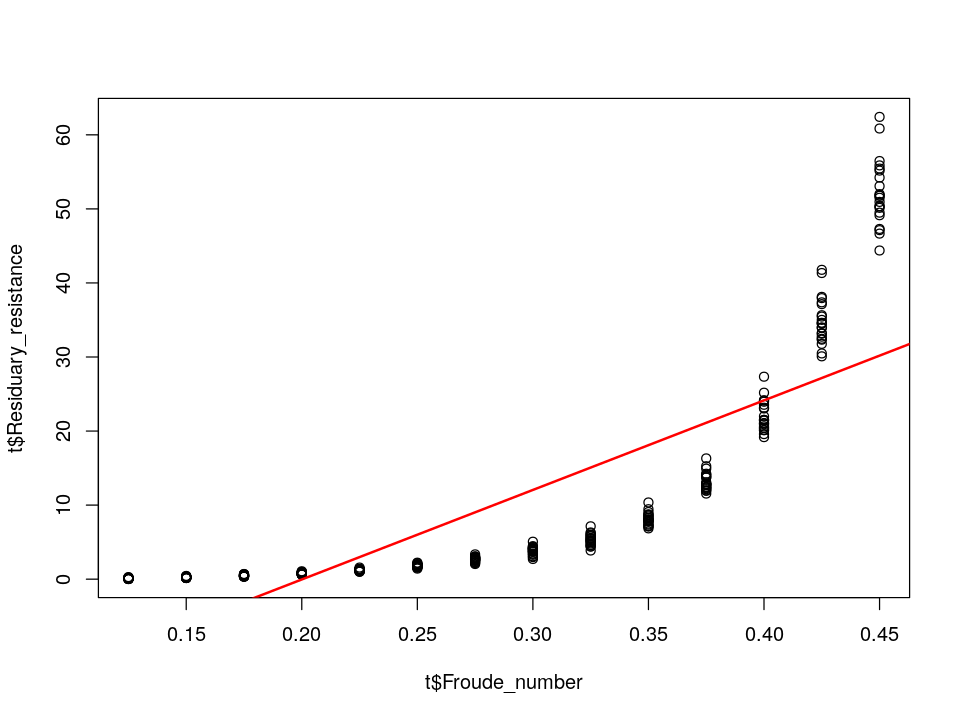

In [15]:
plot(t$Residuary_resistance ~ t$Froude_number)
x <- seq(from = 0, to = 0.5, by = 0.1)
lines(x, model$coefficients[1] + model$coefficients[2] * x, col = "red", lwd = 2)

### Еще примеры

Обучаем на train модель вида $Residuary\_resistance = \theta_1 + \theta_2 \cdot Froude\_number + \theta_3 \cdot Froude\_number^2 + \theta_4 \cdot Froude\_number^3$

*Обозначения в формуле:*

`(x+y)^2` эквивалентно `x^2 + y^2 + xy`, что означает взять признаки `x^2`, `y^2`, `xy`

`I((x+y)^2)` означает взять признак `(x+y)^2`.

In [16]:
model_2 <- lm(formula = Residuary_resistance ~ Froude_number + I(Froude_number^2) + I(Froude_number^3), 
            data = train)
model_2$coefficients
summary(model_2)

(Intercept)      Froude_number I(Froude_number^2) I(Froude_number^3) 
         -47.35009          684.73819        -3113.69366         4611.89046


Call:
lm(formula = Residuary_resistance ~ Froude_number + I(Froude_number^2) + 
    I(Froude_number^3), data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.1376 -1.1891 -0.2925  1.2335 11.9024 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -47.350      3.617  -13.09   <2e-16 ***
Froude_number        684.738     43.337   15.80   <2e-16 ***
I(Froude_number^2) -3113.694    160.041  -19.46   <2e-16 ***
I(Froude_number^3)  4611.890    184.852   24.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.057 on 212 degrees of freedom
Multiple R-squared:  0.9816,	Adjusted R-squared:  0.9814 
F-statistic:  3777 on 3 and 212 DF,  p-value: < 2.2e-16


Сравнить две модели можно в одной таблице

In [17]:
# install.packages('memisc')
library("memisc")
print(mtable(model, model_2))

Loading required package: MASS


Attaching package: ‘memisc’


The following object is masked from ‘package:ggplot2’:

    syms


The following objects are masked from ‘package:stats’:

    contr.sum, contr.treatment, contrasts


The following object is masked from ‘package:base’:

    as.array





Calls:
model: lm(formula = Residuary_resistance ~ Froude_number, data = train)
model_2: lm(formula = Residuary_resistance ~ Froude_number + I(Froude_number^2) + 
    I(Froude_number^3), data = train)

                        model       model_2     
------------------------------------------------
  (Intercept)         -24.216***    -47.350***  
                       (1.801)       (3.617)    
  Froude_number       120.894***    684.738***  
                       (5.916)      (43.337)    
  I(Froude_number^2)              -3113.694***  
                                   (160.041)    
  I(Froude_number^3)               4611.890***  
                                   (184.852)    
------------------------------------------------
  R-squared             0.661         0.982     
  N                   216           216         
  Significance: *** = p < 0.001;   
                ** = p < 0.01; * = p < 0.05  


Значение MSE куда лучше

In [18]:
predicted <- predict(model_2, test)
mean((predicted - test$Residuary_resistance) ^ 2)

[1] 2.872536

Посмотрим на график

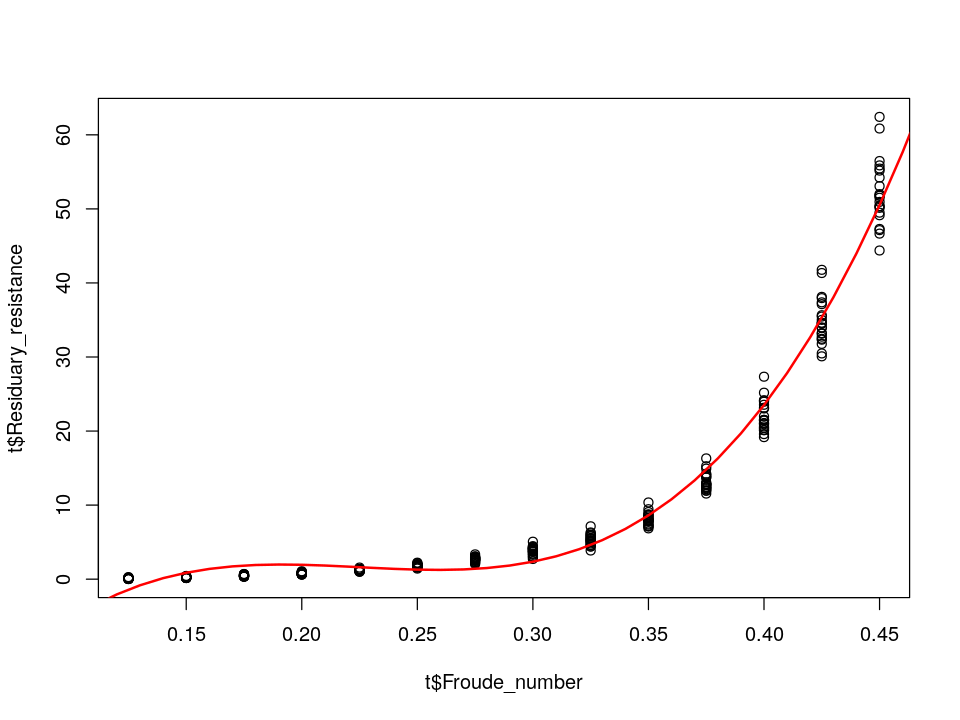

In [19]:
plot(t$Residuary_resistance ~ t$Froude_number)
x <- seq(from = 0, to = 0.5, by = 0.01)
lines(x, 
      model_2$coefficients[1] + model_2$coefficients[2] * x + model_2$coefficients[3] * x^2 + model_2$coefficients[4] * x^3, 
      col = "red", lwd = 2)

Обучим регрессию на всех фичах. Как видим, все остальные фичи незначимы - pvalue мало.

*Чтобы взять в формулу все признаки, можно поставить просто точку*

In [20]:
model <- lm(formula = Residuary_resistance ~ . + I(Froude_number^2) + I(Froude_number^3), 
            data = train)
model$coefficients
summary(model)

(Intercept)     Longitudinal_position     Prismatic_coefficient 
              -38.1592124                 0.2611481               -12.0388957 
Length.displacement_ratio        Beam.draught_ratio         Length.beam_ratio 
                2.9595227                -1.2345403                -3.2440363 
            Froude_number        I(Froude_number^2)        I(Froude_number^3) 
              677.2127057             -3090.2551966              4589.5042400


Call:
lm(formula = Residuary_resistance ~ . + I(Froude_number^2) + 
    I(Froude_number^3), data = train)

Residuals:
   Min     1Q Median     3Q    Max 
-5.615 -1.234 -0.120  1.155 11.216 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -3.816e+01  8.114e+00  -4.703 4.68e-06 ***
Longitudinal_position      2.611e-01  8.794e-02   2.969  0.00334 ** 
Prismatic_coefficient     -1.204e+01  1.165e+01  -1.033  0.30272    
Length.displacement_ratio  2.960e+00  3.676e+00   0.805  0.42163    
Beam.draught_ratio        -1.235e+00  1.427e+00  -0.865  0.38792    
Length.beam_ratio         -3.244e+00  3.703e+00  -0.876  0.38197    
Froude_number              6.772e+02  4.186e+01  16.178  < 2e-16 ***
I(Froude_number^2)        -3.090e+03  1.546e+02 -19.992  < 2e-16 ***
I(Froude_number^3)         4.590e+03  1.785e+02  25.705  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.982 on 20

MSE такое же

In [21]:
predicted <- predict(model, test)
mean((predicted - test$Residuary_resistance) ^ 2)

[1] 2.828179

### Отбор признаков

Процедура отбора фичей из библиотеки
https://cran.r-project.org/web/packages/bestglm/bestglm.pdf

In [22]:
# install.packages('bestglm')
library('bestglm')

bestglm(t, family = gaussian, IC = "BIC")

Loading required package: leaps



BIC
BICq equivalent for q in (0, 0.924068917556141)
Best Model:
               Estimate Std. Error   t value     Pr(>|t|)
(Intercept)   -24.48407   1.533574 -15.96537 3.673160e-42
Froude_number 121.66757   5.033863  24.16982 6.233076e-73

---------

Прикладная статистика и анализ данных, 2019

Никита Волков

https://mipt-stats.gitlab.io/